## Model Development (Geliştirme)
* Simle and Multiple Linear Regression
* Model Evaulation (Değerlendirme) using Visualization
* Polynomial Regression and Pipelines
* R-squared and MSE for In-Sample Evaluation
* Prediction and Decision Making

In [8]:
import numpy as np
import pandas as pd

In [94]:
df = pd.read_csv('automobiles.csv')

In [95]:
df['price'].replace('?',np.nan,inplace=True)
df['price'] = df['price'].astype('float')
df['price'].replace(np.nan,df['price'].mean(),inplace=True)

In [96]:
df['horsepower'].replace('?',np.nan,inplace=True)
df['horsepower'] = df['horsepower'].astype('float')
df['horsepower'].replace(np.nan,df['horsepower'].mean(),inplace=True)

In [97]:
df['curb-weight'].replace('?',np.nan,inplace=True)
df['curb-weight'] = df['curb-weight'].astype('float')
df['curb-weight'].replace(np.nan,df['curb-weight'].mean(),inplace=True)

In [98]:
df['engine-size'].replace('?',np.nan,inplace=True)
df['engine-size'] = df['engine-size'].astype('float')
df['engine-size'].replace(np.nan,df['engine-size'].mean(),inplace=True)

In [99]:
df['highway-mpg'].replace('?',np.nan,inplace=True)
df['highway-mpg'] = df['highway-mpg'].astype('float')
df['highway-mpg'].replace(np.nan,df['highway-mpg'].mean(),inplace=True)

### Simle and Multiple Linear Regression
* Simple Linear Regression -> Doğrusal Regresyon, kestirim yapmak için bir bağımsız değişken kullanıldığını ifade etmektedir. 
* Multiple Linear Regression -> Çoklu Doğrusal Regresyon ise kestirim yapmak için birden çok bağımsız değişken kullanıldığına ifade etmektedir. 

In [190]:
from sklearn.linear_model import LinearRegression

In [191]:
lm = LinearRegression() # bir obje oluşturuyoruz

In [192]:
X = df[['highway-mpg']] # Bağımsız (Kestirimci) değişken 
Y = df['price'] # Bağımlı (Hedef) değişken 

* y = b0 + b1 * x
* y = Bağımlı (hedef) değişken
* b0 = intercept (sabit)
* b1 = slope (eğim)
* x = Bağımsız (kestirimci) değişken

In [193]:
lm.fit(X,Y) # b0 ve b1 parametrelerini bulmak için fit metodu kullanılır

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [194]:
Yhat = lm.predict(X) # kestirim sonucunu predict metodu ile elde ederiz. Çıktısı bir dizidir.

In [195]:
lm.intercept_ # b0 sabiti (intercept) oluşturduğumuz lm nesnesinin (LinearRegression) bir özelliğidir 

37470.66014138312

In [196]:
lm.coef_ # b1 eğim (slope) değeri de lm nesnesinin bir özelliğidir

array([-789.02661986])

* Fiyat (price) ile şehir-dışı yakıt tüketimi (highway-mpg) arasındaki ilişkiye ait denklem
    * <b> Price =  37470.66014138312 (lm.intercept_) - 789.02661986 (lm.coef_) * highway-mpg</b>
    * ŷ = b0 + b1 * x (kestirim sonucu elde edildiğini belirtmek için y şapkalı yazılır)

### Multiple Linear Regression
* Bir hedef değişken (y) ile 2 veya daha fazla kestirimci (x) değişkeni arasındaki ilişkiyi açıklamak için kullanılır
* ŷ = b0 + b1 * x1 + b2 * x2 + b3* x3 + .... b8 * x8
* Sadece 2 kestirici değişken varsa hedef değerleri görselleştirebiliriz

In [197]:
from sklearn.linear_model import LinearRegression

In [198]:
lm = LinearRegression()

In [199]:
Z = df[['horsepower','curb-weight','engine-size','highway-mpg']] # kestirici değişkenlerimizi seçiyoruz

In [200]:
Y = df['price']

In [201]:
lm.fit(Z,df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [202]:
Yhat = lm.predict(Z)

In [203]:
lm.intercept_

-9239.379970934511

In [204]:
lm.coef_

array([ 18.12178086,   3.80596513, 101.121117  , -65.10968116])

* <b> Price =  -9239.379970934511 + (18.12178086 * horsepower) + (3.80596513 * curb-weight) + (101.121117 * engine-size) + (-65.10968116 * highway-mpg)</b>
* ŷ = b0 + (b1 * x1) + (b2 * x2) + (b3 * x3) + (b4 * x4) 

### Model Evaulation Using Visualization

In [207]:
import seaborn as sns
import matplotlib.pyplot as plt

(0, 48134.519482330856)

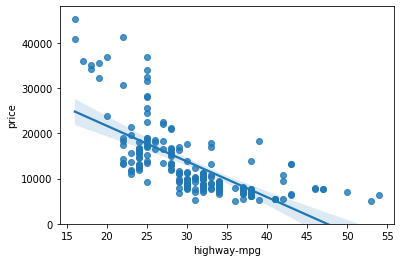

In [208]:
sns.regplot(data=df,x='highway-mpg',y='price')
plt.ylim(0,)

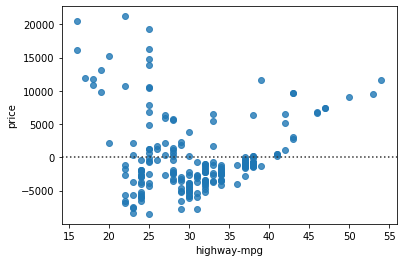

In [210]:
sns.residplot(df['highway-mpg'],df['price']) # ilk parametre bağımsız değişken (kestirici), ikinci parametre ise bağımlı (hedef) değişkendir

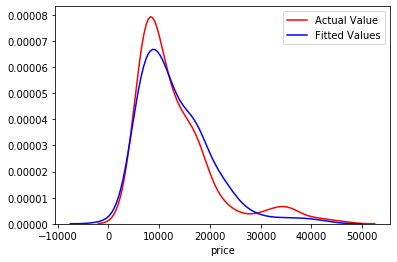

In [211]:
ax1 = sns.distplot(df['price'], hist=False, color='r', label = 'Actual Value')
sns.distplot(Yhat, hist=False, color = 'b', label = 'Fitted Values', ax=ax1)

### Polynomial Regression and Pipelines
* Polinom regresyonu, genel doğrusal regresyonun özel bir versiyonudur.
* Bu metot eğri-doğrusal ilişkileri tanımlamakta oldukça faydalıdır.
* Modeldeki kestirici değişkenlerin karesini veya daha bir yüksek dereceden üssünü alarak elde ettiğiniz veri dönüşümlerine <b> eğri-doğrusal ilişki </b> denir.